### Importações

In [28]:
import pandas as pd
import numpy as np
import sys
import os

In [29]:
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
from Functions.FNC_Pro import lista_produtos, configurar_credenciais_bq, Base_venda, best_sellers

In [30]:
SKU = '7172'

### Best Sellers

In [31]:
base_best_sellers = best_sellers(r'C:/Users/joao.pcarvalho/Desktop/Git Repositórios/Forecast-vendas-e-elasticidade/Forecast/Best_Sellers.xlsx')


### Base de vendas

In [32]:
configurar_credenciais_bq(r'G:Drives compartilhados/Bases BI/epoca-230913-b478a9a0dd4c.json')

Venda = Base_venda(SKU)

SKU 7172: Histórico de dados ajustado para começar em 2023-01-01, o primeiro dia com vendas.


In [33]:
Venda.tail(40)

,SKU,Preco_Listado,Preco,Demanda,Log_Preco,Log_Demanda,Log_Demanda_7D,Ano_Mes,Black_Friday,Domingo,Quarta-feira,Quinta-feira,Segunda-feira,Sexta-feira,Sábado,Terça-feira,Log_Preco_7D,promocionado
Data,,,,,,,,,,,,,,,,,,
2025-08-27,7172,361.26,361.26,16.0,5.889598,2.772589,3.116685,2025-08,0,0,1,0,0,0,0,0,5.850094,0
2025-08-28,7172,362.57,362.57,14.0,5.893218,2.639057,2.824774,2025-08,0,0,0,1,0,0,0,0,5.875192,0
2025-08-29,7172,356.06,356.06,16.0,5.875099,2.772589,2.763620,2025-08,0,0,0,0,0,1,0,0,5.883100,0
2025-08-30,7172,351.02,351.02,18.0,5.860843,2.890372,2.816264,2025-08,0,0,0,0,0,0,1,0,5.882128,0
2025-08-31,7172,306.96,306.96,59.0,5.726717,4.077537,3.153956,2025-08,0,1,0,0,0,0,0,0,5.861693,1
2025-09-01,7172,330.41,330.41,32.0,5.800334,3.465736,3.241476,2025-09,0,0,0,0,1,0,0,0,5.848217,0
2025-09-02,7172,345.51,345.51,24.0,5.845022,3.178054,3.241476,2025-09,0,0,0,0,0,0,0,1,5.843043,0
2025-09-03,7172,288.91,288.91,234.0,5.666115,5.455321,4.038026,2025-09,0,0,1,0,0,0,0,0,5.812611,1
2025-09-04,7172,286.30,286.30,301.0,5.657040,5.707110,4.582048,2025-09,0,0,0,1,0,0,0,0,5.779495,1


### Avaliação estatística

=== AVALIAÇÃO ESTATÍSTICA PARA SKU 7172 ===

1. ESTATÍSTICAS DESCRITIVAS:
           Preco    Demanda  Log_Preco  Log_Demanda  Log_Preco_7D  \
count  1009.0000  1009.0000  1009.0000    1009.0000     1009.0000   
mean    302.2160    52.1972     5.7059       3.6483        5.7059   
std      31.2231    57.9099     0.1023       0.8000        0.0953   
min     224.1700     0.0000     5.4124      -4.6052        5.4253   
25%     279.9900    23.0000     5.6348       3.1355        5.6426   
50%     296.3700    39.0000     5.6916       3.6636        5.6920   
75%     323.4000    66.0000     5.7789       4.1897        5.7712   
max     381.0100  1048.0000     5.9428       6.9546        5.9173   

       Log_Demanda_7D  
count       1009.0000  
mean           3.7380  
std            0.6513  
min            2.0053  
25%            3.2470  
50%            3.7512  
75%            4.2195  
max            5.5984  


2. VALORES MISSING:
SKU               0
Preco_Listado     0
Preco             0
Demand

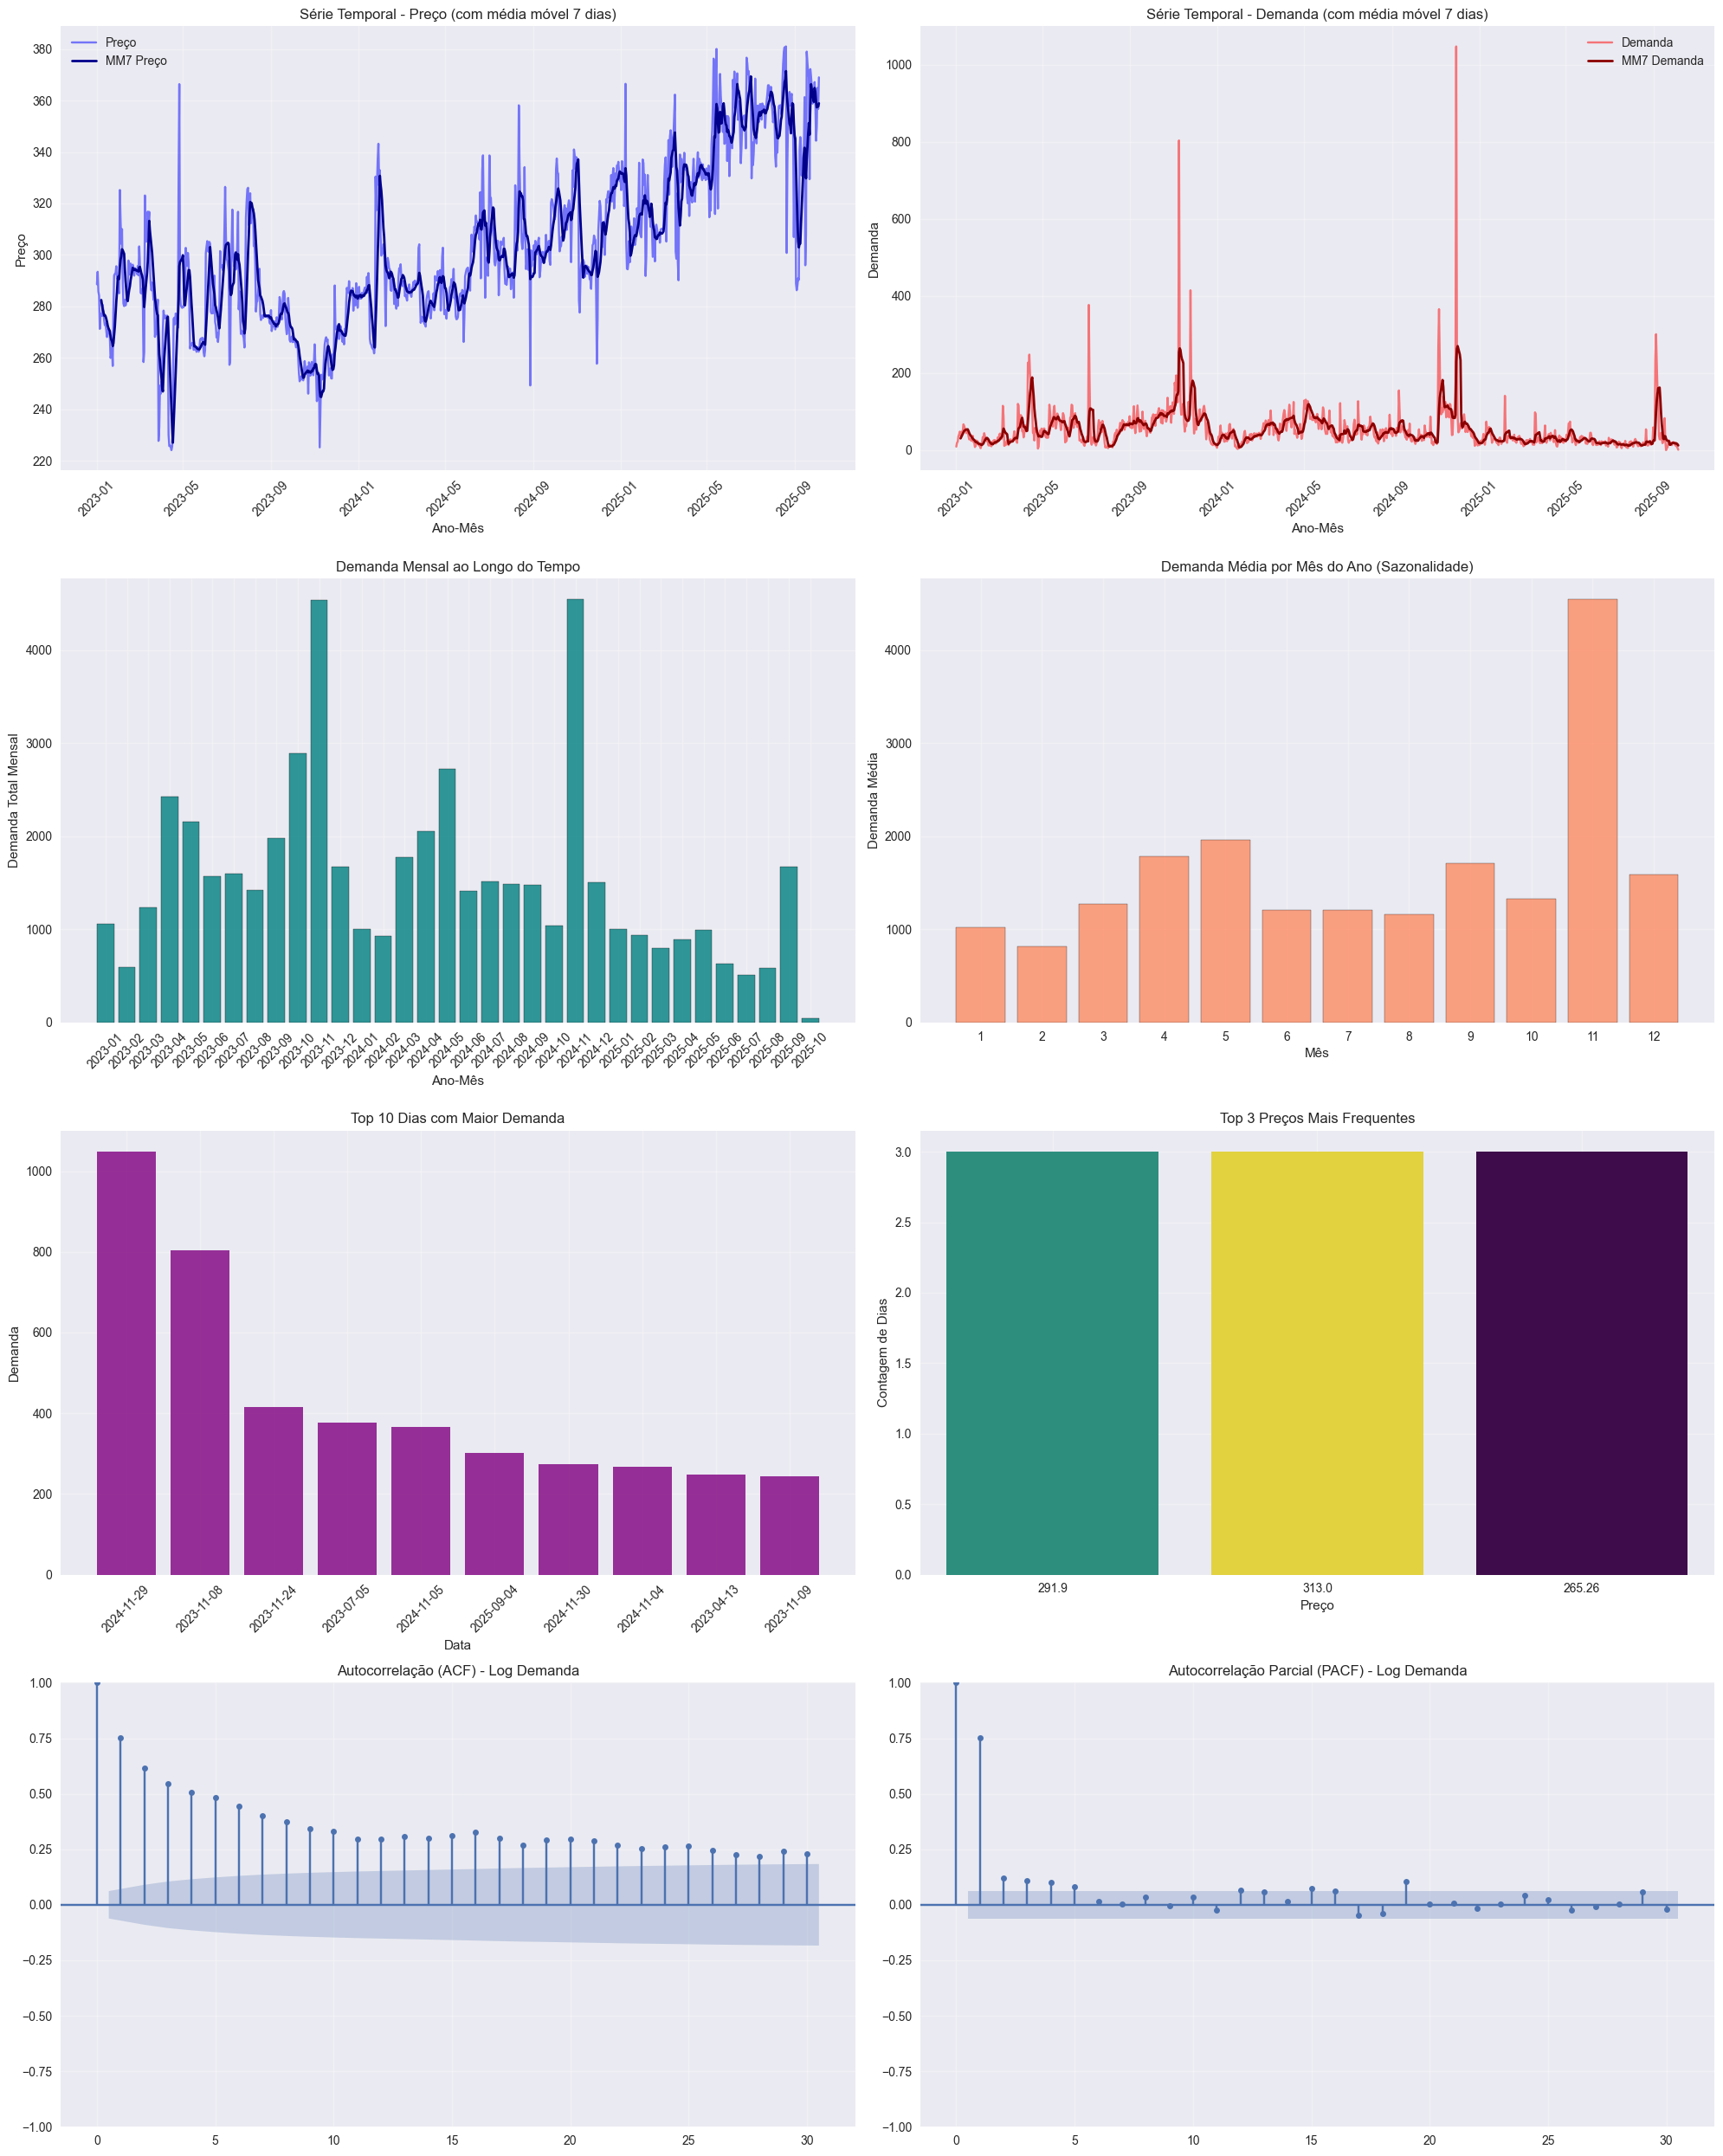

7. ANÁLISE DE SAZONALIDADE POR DIA DA SEMANA:
Demanda média por dia da semana:
  Segunda-feira: 49.78
  Terça-feira: 54.38
  Quarta-feira: 61.76
  Quinta-feira: 55.28
  Sexta-feira: 56.17
  Sábado: 43.58
  Domingo: 44.48

8. RESUMO E RECOMENDAÇÕES PARA MODELAGEM:
TODAS as variáveis são estacionárias - OK para modelagem

 Correlação Log_Preco x Log_Demanda: -0.6881
   → Correlação forte - bom preditor

 RECOMENDAÇÕES FINAIS PARA VALIDAÇÃO CRUZADA:
1. Variáveis já estacionárias - pode prosseguir diretamente
4. Use TimeSeriesSplit do sklearn para validação cruzada temporal
5. Monitore overfitting comparando performance treino/teste
6. Considere modelos SARIMA para capturar sazonalidade

 Análise concluída - Dados prontos para modelagem!


(     AnoMes       Preco  Demanda  Log_Preco  Log_Demanda
 0   2023-01  277.904194   1061.0   5.626527     3.411263
 1   2023-02  293.395000    591.0   5.680943     2.949246
 2   2023-03  283.633548   1231.0   5.644110     3.463641
 3   2023-04  267.952000   2422.0   5.584716     4.070361
 4   2023-05  272.689677   2154.0   5.607218     4.179816
 5   2023-06  289.950000   1572.0   5.668227     3.767679
 6   2023-07  291.666129   1599.0   5.673398     3.480653
 7   2023-08  289.581290   1422.0   5.666727     3.592199
 8   2023-09  275.104667   1975.0   5.616945     4.147224
 9   2023-10  257.608065   2889.0   5.551188     4.519359
 10  2023-11  257.092000   4539.0   5.548512     4.801911
 11  2023-12  277.811613   1675.0   5.626540     3.706341
 12  2024-01  290.620968   1004.0   5.668784     3.225261
 13  2024-02  291.815517    932.0   5.675720     3.401869
 14  2024-03  286.570968   1777.0   5.657736     4.003538
 15  2024-04  284.508333   2051.0   5.650393     4.151876
 16  2024-05  

In [34]:
from Functions.FNC_aval_estat import avaliar_dados_series_temporais

avaliar_dados_series_temporais(Venda,SKU)

### Modelo: Validação Cruzada de Séries Temporais

In [35]:
from Functions.FNC_TSCV import modelo_validacao_cruzada_series_temporais, converter_para_escala_original,encontrar_melhor_alpha


resultados_modelo_principal = modelo_validacao_cruzada_series_temporais(
    Venda, SKU, 
    'Log_Preco', 'Quarta-feira', 'Terça-feira', 'promocionado', #Variáveis independentes
    var_dpd = 'Log_Demanda',                                    #Variáveis dependentes
    n_splits=10
)

# Converter para a escala original
metricas_originais = converter_para_escala_original(resultados_modelo_principal, Venda)

# Encontre o melhor alpha, mas armazene em variáveis diferentes para não sobrescrever
X_cols = ['Log_Preco','Black_Friday','promocionado', 'Quarta-feira','Terça-feira']
y_col = 'Log_Demanda'
melhor_alpha, resultados_alpha = encontrar_melhor_alpha(Venda, X_cols, y_col)

=== MODELO DE VALIDAÇÃO CRUZADA - SKU 7172 ===

Verificando qualidade dos dados...
 Executando validação cruzada temporal...
 Fold 1:
   Período teste: 2023-04-10 a 2023-07-09
   RMSE: 0.8249, WAPE: 17.62%
 Fold 2:
   Período teste: 2023-07-10 a 2023-10-08
   RMSE: 0.5789, WAPE: 13.08%
 Fold 3:
   Período teste: 2023-10-09 a 2024-01-07
   RMSE: 0.6833, WAPE: 13.47%
 Fold 4:
   Período teste: 2024-01-08 a 2024-04-07
   RMSE: 0.4768, WAPE: 10.45%
 Fold 5:
   Período teste: 2024-04-08 a 2024-07-07
   RMSE: 0.6165, WAPE: 13.56%
 Fold 6:
   Período teste: 2024-07-08 a 2024-10-06
   RMSE: 0.4994, WAPE: 11.48%
 Fold 7:
   Período teste: 2024-10-07 a 2025-01-05
   RMSE: 0.8105, WAPE: 16.94%
 Fold 8:
   Período teste: 2025-01-06 a 2025-04-06
   RMSE: 0.3397, WAPE: 7.90%
 Fold 9:
   Período teste: 2025-04-07 a 2025-07-06
   RMSE: 0.4260, WAPE: 10.57%
 Fold 10:
   Período teste: 2025-07-07 a 2025-10-05
   RMSE: 0.9014, WAPE: 14.52%

 RESULTADOS FINAIS DO MODELO
 Métricas Médias nos 10 folds:
   R

### Modelo: SARIMAX 

In [36]:
from Functions.FNC_ARIMAX import modelo_sarimax, encontrar_melhores_parametros_sarimax

# Variáveis exógenas - agora incluindo os dias da semana e a promoção
exog_vars_sarimax = [
    'Log_Preco',
    'Quarta-feira',
    'Terça-feira',
    'promocionado'
]

# Encontrar os melhores parâmetros para o SKU atual, incluindo o termo de tendência (intercepto)
best_order, best_seasonal_order, best_trend = encontrar_melhores_parametros_sarimax(
    Venda,
    SKU,
    exog_vars=exog_vars_sarimax,
    endog_var='Log_Demanda'
)

# Treinar o modelo ARIMAX com os parâmetros otimizados
resultado_sarimax = modelo_sarimax(
    Venda, 
    SKU, 
    *exog_vars_sarimax,
    endog_var='Log_Demanda',
    order= best_order, 
    seasonal_order=best_seasonal_order,
    trend = best_trend
)


--- Buscando Melhores Parâmetros ARIMAX para SKU: 7172 ---

--- Iniciando busca de parâmetros para modelo de Regressão com Erros ARMA (d=0, D=0) ---
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1483.975, Time=11.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2467.548, Time=1.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1527.762, Time=0.83 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1960.815, Time=3.87 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1025.791, Time=4.76 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1492.794, Time=1.74 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1025.085, Time=2.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1489.694, Time=1.49 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=2.17 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1013.380, Time=3.98 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1479.649, Time=0.52 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1434.814, Time=2.30 sec
 ARIMA(1,0,3)(0,0,0

### Consolidação e Comparação de Previsões

In [37]:
from Functions.FNC_Previsoes import gerar_previsoes_e_relatorios, gerar_relatorio_comparacao

# Construir o caminho para a planilha de preços de forma robusta
caminho_previsao = os.path.join(project_root, 'Forecast', 'Precos_para_previsoes.xlsx')

# Definir as colunas de features usadas nos modelos
X_cols_tscv = ['Log_Preco', 'Quarta-feira', 'Terça-feira', 'promocionado']

# Carregar a lista de best sellers para aplicar a regra de negócio
best_sellers_list = base_best_sellers['SKU'].astype(str).tolist()

# Gerar as previsões a partir do arquivo de preços, aplicando a regra de best sellers
df_previsoes, _ = gerar_previsoes_e_relatorios(
    resultados_modelo_principal,
    resultado_sarimax,
    SKU,
    caminho_previsao,
    X_cols_tscv=X_cols_tscv,
    best_sellers_list=best_sellers_list
)

# Gerar o relatório de comparação de modelos com todas as colunas
df_relatorio = gerar_relatorio_comparacao(
    resultados_modelo_principal,
    resultado_sarimax,
    SKU,
    X_cols_tscv
)

--- INICIANDO GERAÇÃO DE PREVISÕES E RELATÓRIOS ---

Calculando previsões para o SKU 7172 com o modelo de Validação Cruzada (TSCV)...
Calculando previsões para o SKU 7172 com o modelo ARIMAX...
  DECISÃO: TSCV escolhido como modelo ideal (baseado no AIC)
  INFO: SKU 7172 é um best seller. Aplicando regra de promoção (x2.5).

Arquivo de previsões salvo em: ../Resultados/previsoes_consolidadas_7172.csv
Arquivo de relatório de modelos salvo em: ../Resultados/relatorio_comparacao_modelos_7172.csv

--- Processo Concluído ---


In [38]:
print("DataFrame com as Previsões Consolidadas:")
df_previsoes.head(40)

DataFrame com as Previsões Consolidadas:


,Data,SKU,Preco,previsao_SARIMAX,previsao_TSCV,previsao_total
0,2025-09-18,7172,379,11.051265,10.248404,10.248404
1,2025-09-19,7172,375,0.700252,10.777352,11.477604
2,2025-09-20,7172,370,2.250886,11.485821,13.736707
3,2025-09-21,7172,369,4.201204,11.634209,15.835413
4,2025-09-22,7172,329,15.357800,20.048721,20.048721
5,2025-09-23,7172,372,12.027461,12.345880,12.345880
6,2025-09-24,7172,369,15.886161,12.934101,12.934101
7,2025-09-25,7172,366,16.554205,12.093511,12.093511
8,2025-09-26,7172,358,18.638681,13.430023,13.430023
9,2025-09-27,7172,360,15.723503,13.079797,13.079797


In [39]:
print("DataFrame com o Relatório de Comparação dos Modelos:")
df_relatorio.head()

DataFrame com o Relatório de Comparação dos Modelos:


,sku,data_rodagem,modelo_ideal,intercepto_tscv,coef_log_preco_tscv,coef_quarta-feira_tscv,coef_terça-feira_tscv,coef_promocionado_tscv,intercepto_sarimax,coef_log_preco_sarimax,coef_quarta-feira_sarimax,coef_terça-feira_sarimax,coef_promocionado_sarimax,AIC_sarimax,BIC_sarimax,AIC_cruzado,BIC_cruzado
0,7172,2025-10-05 21:43:01,TSCV,30.489319,-4.743078,0.105917,0.097778,0.544921,0.755451,-5.092553,0.144992,0.114564,0.002881,1135.063253,1184.200626,749.108562,769.340945


### Visualização da Performance das Previsões

--- GERANDO GRÁFICOS DE COMPARAÇÃO DE PREVISÕES PARA SKU 7172 ---


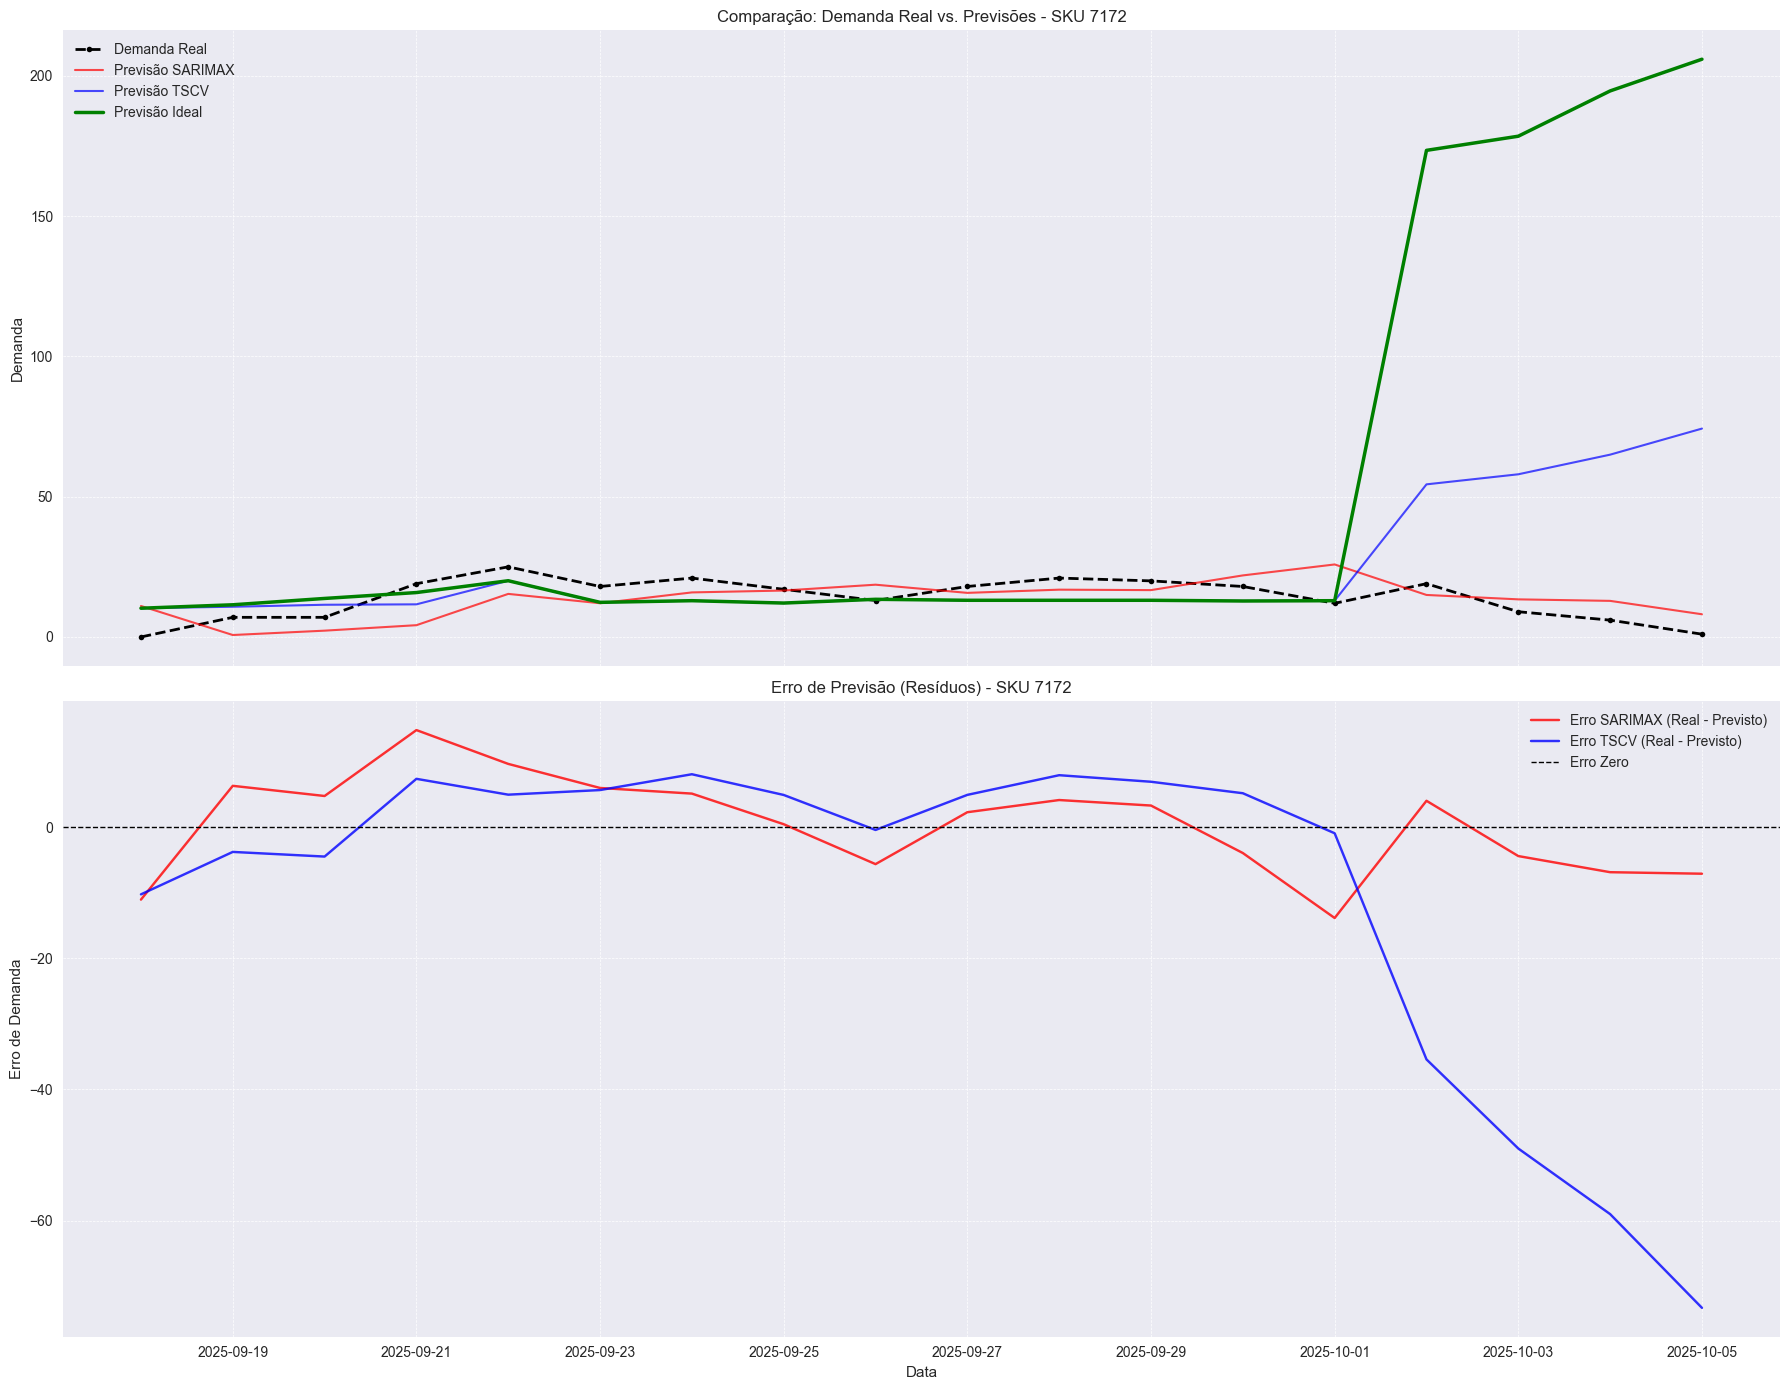

In [40]:
from Functions.FNC_aval_estat import plotar_comparacao_previsoes


plotar_comparacao_previsoes(df_previsoes, Venda, SKU)

### Previsão Futura (Próximos 30 Dias)

--- INICIANDO PREVISÃO PARA OS PRÓXIMOS 30 DIAS (SKU: 7172) ---
Último preço registrado: 369.00 em 2025-10-05
Para os próximos 30 dias, o preço será baseado no mesmo dia 30 dias atrás, ou no último preço se a data não existir.
  INFO: SKU 7172 é um best seller. Aplicando regra de promoção (x2.5) na previsão futura.
  Gerando gráfico de previsão futura...

Gráfico de previsão salvo em: ../Graficos/previsao_30_dias_sku_7172.png


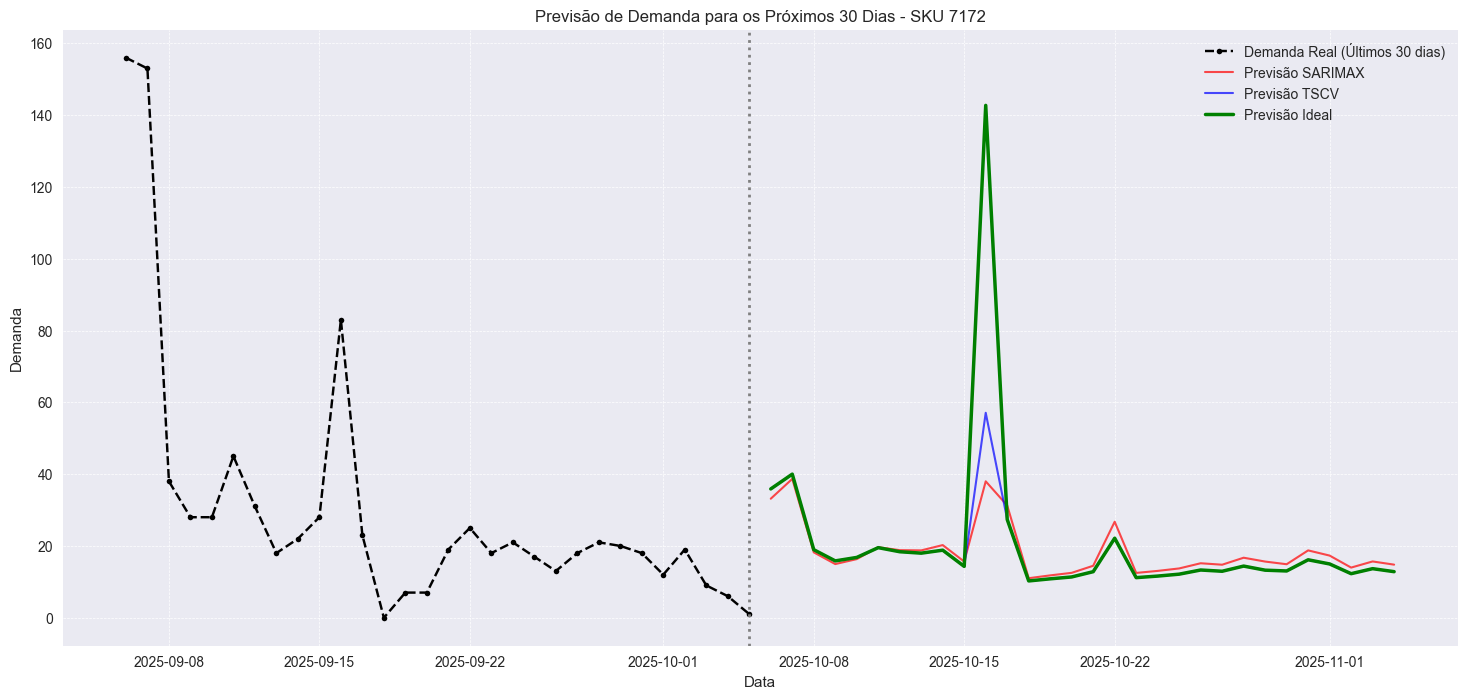

In [41]:
from Functions.FNC_Previsoes import pred_prox_30_dias

# Carregar a lista de best sellers para aplicar a regra de negócio
best_sellers_list = base_best_sellers['SKU'].astype(str).tolist()

# Gerar o gráfico e o DataFrame com a previsão para os próximos 30 dias
df_previsao_futura = pred_prox_30_dias(
    resultados_modelo_principal,
    resultado_sarimax,
    Venda,
    SKU,
    X_cols_tscv=['Log_Preco', 'Quarta-feira', 'Terça-feira', 'promocionado'],
    best_sellers_list=best_sellers_list
)

In [42]:
print("DataFrame com a previsão para os próximos 30 dias:")
df_previsao_futura.head(31)

DataFrame com a previsão para os próximos 30 dias:


,Data,SKU,Preco,promocionado,Log_Preco,Quarta-feira,Terça-feira,previsao_TSCV,previsao_SARIMAX,previsao_total
0,2025-10-06,7172,291.01,0,5.673358,0,0,35.878620,33.152265,35.878620
1,2025-10-07,7172,290.34,0,5.671053,0,1,39.998924,38.674718,39.998924
2,2025-10-08,7172,340.45,0,5.830268,1,0,18.950298,18.214045,18.950298
3,2025-10-09,7172,345.79,0,5.845832,0,0,15.832802,14.945469,15.832802
4,2025-10-10,7172,341.52,0,5.833406,0,0,16.793947,16.326951,16.793947
5,2025-10-11,7172,330.86,0,5.801695,0,0,19.519733,19.645022,19.519733
6,2025-10-12,7172,335.08,0,5.814369,0,0,18.380902,18.821539,18.380902
7,2025-10-13,7172,336.62,0,5.818955,0,0,17.985454,18.755284,17.985454
8,2025-10-14,7172,340.38,0,5.830063,0,1,18.815025,20.234056,18.815025
9,2025-10-15,7172,361.31,0,5.889736,1,0,14.292831,15.640898,14.292831
